# 1. Dataset for emotion prediction

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

'0': sadness
               '1': joy
               '2': love
               '3': anger
               '4': fear
               '5': surprise

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import load_dataset
dataset = load_dataset('json', data_files={
    'train': '/content/drive/MyDrive/AIM_WORK/Lab6/train.jsonl',
    'test':'/content/drive/MyDrive/AIM_WORK/Lab6/validation.jsonl'})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
!py -m pip install nltk

/bin/bash: line 1: py: command not found


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

vectorizer = CountVectorizer(max_features=500, min_df=4, max_df=0.7, stop_words=stopwords.words('english'))
X_train_vec = vectorizer.fit_transform(dataset['train']['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vectorizer.get_feature_names_out()

array(['able', 'absolutely', 'accepted', 'aching', 'actually', 'admit',
       'afraid', 'agitated', 'ago', 'almost', 'alone', 'already', 'also',
       'always', 'amazed', 'amazing', 'amp', 'angry', 'annoyed',
       'another', 'anxious', 'anymore', 'anyone', 'anything',
       'apprehensive', 'around', 'ashamed', 'ask', 'asked', 'assured',
       'away', 'awful', 'awkward', 'baby', 'back', 'bad', 'beaten',
       'beautiful', 'become', 'bed', 'began', 'believe', 'beloved',
       'best', 'better', 'big', 'bit', 'blank', 'blessed', 'blog', 'body',
       'book', 'books', 'bothered', 'brave', 'burdened', 'call', 'calm',
       'came', 'cannot', 'cant', 'care', 'caring', 'cause', 'certain',
       'change', 'child', 'children', 'class', 'close', 'cold', 'come',
       'comes', 'comfortable', 'coming', 'completely', 'confident',
       'confused', 'content', 'control', 'convinced', 'cool', 'could',
       'couldnt', 'cranky', 'creative', 'curious', 'cute', 'dangerous',
       'day', 'day

In [ ]:
X_train_vec[:1].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
X_train_vec[:1].toarray().sum()

2

In [ ]:
dataset['train']['text'][:1]

['i didnt feel humiliated']

In [ ]:
vocabulary = vectorizer.get_feature_names_out()

In [ ]:
len(vocabulary)

500

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf = TfidfTransformer()

In [ ]:
X_train_idf = tfidf.fit_transform(X_train_vec)

In [ ]:
X_train_idf[:1].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
X_train_idf[:1].toarray().sum()

1.2295066506768701

In [ ]:
X_test_vec = vectorizer.transform(dataset['test']['text'])

In [ ]:
X_test_idf = tfidf.transform(X_test_vec)

In [ ]:
X_test_idf[:1].toarray().sum()

2.52371815232768

In [ ]:
X_train = X_train_idf.toarray()
X_test = X_test_idf.toarray()

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_train, X_test, y_train, y_test = X_train,X_test,dataset['train']['label'],\
                            dataset['test']['label']

In [ ]:
# Задача. Варьируя параметры ансамбля в подходам блэндинг и стэкинг, обучить оптимальный классификатор.
# Визуализировать графики зависимости предсказания от параметров модели.

# Stacking

##Функция стэкинга

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Изменяются параметры K-fold (N), n_estimators и max_depth для первого слоя моделей и конечной модели RandomForestClassifier

In [ ]:
def stacking(N=10,
    n_estim_first_models=2,
    max_depth_first_models=2,
    min_samples_leaf_first_models=1,
    n_estim_final_models=10,
    max_depth_final_models=6,
    min_samples_leaf_final_models=1):
    # N = 10
    y_pred_1 = []
    crf_stack = []
    kf = KFold(n_splits=N, random_state=None, shuffle=False)

    x_test_2 = []
    y_test_2 = []

    pre_prediction = np.zeros((len(X_train), N))

    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
        y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]

        crf_stack.append(RandomForestClassifier(
                            n_estimators = n_estim_first_models,
                            max_depth=max_depth_first_models,
                            #min_samples_leaf=min_samples_leaf_first_models,
                            random_state=i))
        crf_stack[-1].fit(X_train_0,y_train_0)
        pre_prediction[test_index,i]=crf_stack[-1].predict(X_test_1)

    clf_stack_final = RandomForestClassifier(
        n_estimators = n_estim_final_models,
        #max_depth=max_depth_final_models,
        #min_samples_leaf=min_samples_leaf_final_models,
        random_state=42)
    #clf_stack_final = LogisticRegression()
    clf_stack_final.fit(pre_prediction, y_train)
    return crf_stack, clf_stack_final

In [ ]:
def make_stacking_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

# y_test_pred = make_stacking_prediction(crf_stack,clf_stack_final, X_test)
# metrics.accuracy_score(y_test, y_test_pred)

## Варьирование количества оценщиков для моделей первого слоя

In [ ]:
n_estim_forest_model_acc = []

for i in range(2, 303, 50):
    forest_model = RandomForestClassifier(n_estimators = i, max_depth=200, n_jobs=-1, random_state=42)
    # DecisionTreeRegressor(max_depth=i*5+1, min_samples_leaf=1000)
    forest_model.fit(X_train, y_train)
    y_test_pred = forest_model.predict(X_test)
    n_estim_forest_model_acc.append(metrics.accuracy_score(y_test, y_test_pred))

<ipython-input-149-53874cdaf2e4>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


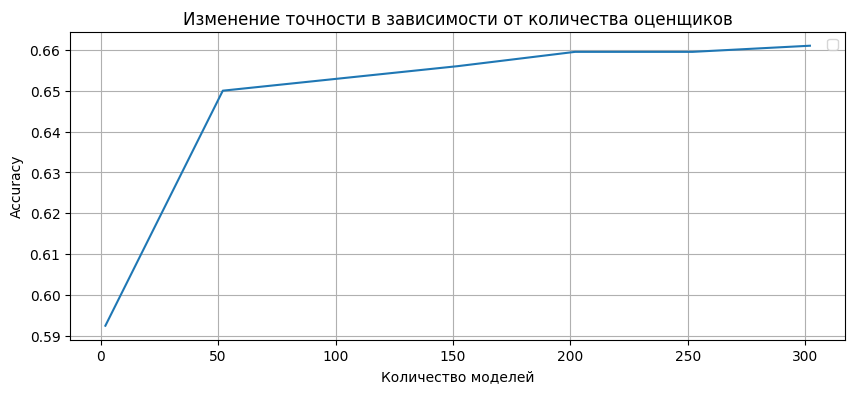

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение точности в зависимости от количества оценщиков')

plt.plot([i for i in range(2, 303, 50)], n_estim_forest_model_acc)
plt.legend()
plt.xlabel('Количество моделей')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## Варьирование максимальной глубины деревьев для моделей первого слоя

In [ ]:
forest_model_acc = []

for i in range(10, 311, 50):
    forest_model = RandomForestClassifier(n_estimators = 200, max_depth=i, n_jobs=-1, random_state=42)
    # DecisionTreeRegressor(max_depth=i*5+1, min_samples_leaf=1000)
    forest_model.fit(X_train, y_train)
    y_test_pred = forest_model.predict(X_test)
    forest_model_acc.append(metrics.accuracy_score(y_test, y_test_pred))

<ipython-input-146-256dc981867c>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


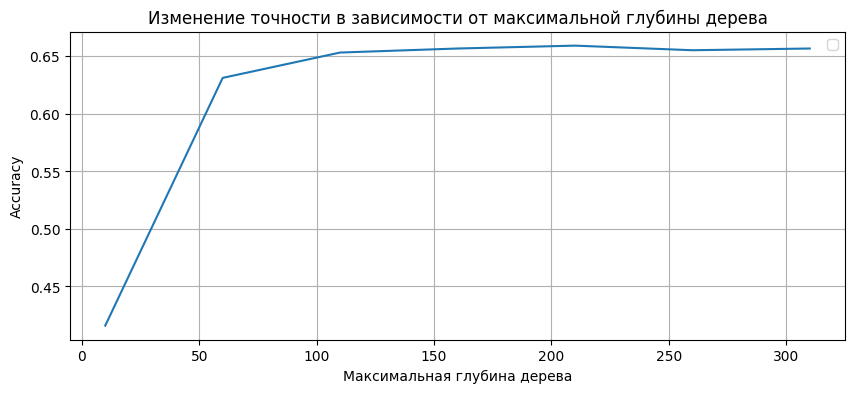

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение точности в зависимости от максимальной глубины дерева')

plt.plot([i for i in range(10, 311, 50)], forest_model_acc)
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## Обучение первого слоя моделей и анализ параметров для конечной модели

In [ ]:
N = 2
y_pred_1 = []
crf_stack = []
kf = KFold(n_splits=N, random_state=None, shuffle=False)

x_test_2 = []
y_test_2 = []

pre_prediction = np.zeros((len(X_train), N))

for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_0, X_test_1 = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train_0, y_test_1 = np.array(y_train)[train_index], np.array(y_train)[test_index]

    crf_stack.append(RandomForestClassifier(n_estimators = 200, max_depth=100, random_state=i))
    crf_stack[-1].fit(X_train_0,y_train_0)
    pre_prediction[test_index,i]=crf_stack[-1].predict(X_test_1)

## Варьирование количества оценщиков для конечной модели

In [ ]:
final_model_acc = []

for i in range(2, 1003, 50):
    final_model = RandomForestClassifier(n_estimators=i, max_depth=6, random_state=42)
    final_model.fit(pre_prediction, y_train)
    y_test_pred = make_stacking_prediction(crf_stack, final_model, X_test)
    final_model_acc.append(metrics.accuracy_score(y_test, y_test_pred))

<ipython-input-167-7effc30944f1>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


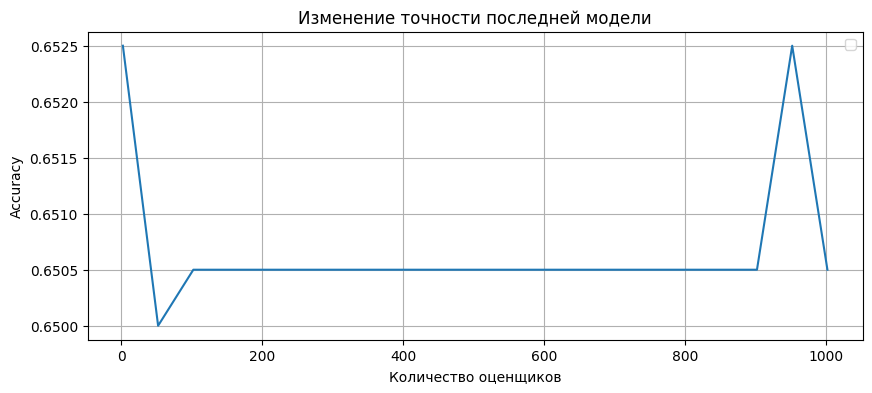

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение точности последней модели')

plt.plot([i for i in range(2, 1003, 50)], final_model_acc)
plt.legend()
plt.xlabel('Количество оценщиков')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## Варьирование максимальной глубины дерева для моделей первого слоя

In [ ]:
max_depth_final_model_acc = []

for i in range(10, 1011, 50):
    final_model = RandomForestClassifier(n_estimators=2, min_samples_split=i, random_state=42)
    final_model.fit(pre_prediction, y_train)
    y_test_pred = make_stacking_prediction(crf_stack, final_model, X_test)
    max_depth_final_model_acc.append(metrics.accuracy_score(y_test, y_test_pred))

<ipython-input-181-34000006dc9f>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


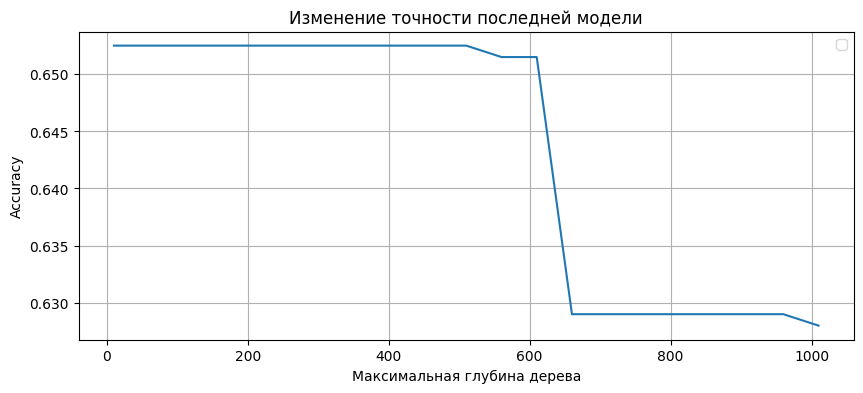

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение точности последней модели')

plt.plot([i for i in range(10, 1011, 50)], max_depth_final_model_acc)
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## Варьирование K-fold для моделей первого слоя

In [ ]:
stacking_accuracy_scores = []
# clf_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

for i in range(2, 23, 5):
    crf_stack, clf_stack_final = stacking(N=i,
                                      n_estim_first_models=200,
                                      max_depth_first_models=100,
                                      n_estim_final_models=2)
    y_test_pred = make_stacking_prediction(crf_stack,clf_stack_final, X_test)
    stacking_accuracy_scores.append(metrics.accuracy_score(y_test, y_test_pred))

<ipython-input-186-f79441f4a490>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


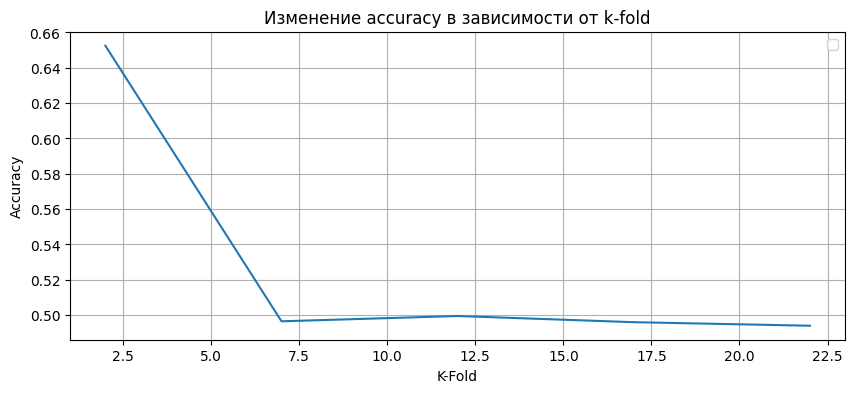

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение accuracy в зависимости от k-fold')

plt.plot([i for i in range(2, 23, 5)], stacking_accuracy_scores)
plt.legend()
plt.xlabel('K-Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

##Модель стэкинга с выявленными выше параметрами

In [ ]:
crf_stack, clf_stack_final = stacking(N=2,
                                      n_estim_first_models=200,
                                      max_depth_first_models=100,
                                      n_estim_final_models=2)
y_test_pred = make_stacking_prediction(crf_stack,clf_stack_final, X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.6525

In [ ]:
print('accuracy стэкинг-модели:', np.round(metrics.accuracy_score(y_test, y_test_pred), 4))

accuracy стэкинг-модели: 0.6525


# Blending

In [ ]:
X_train_0, X_train_1, y_train_0, y_train_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def blending(N=2):
    #N = 2
    y_pred_1 = []
    crf = []
    for n in range(1,N+1):
        crf.append(RandomForestClassifier(n_estimators = 200,max_depth=100, random_state=n))
        crf[-1].fit(X_train_0,y_train_0)
        y_pred_1.append(crf[-1].predict(X_train_1).reshape(len(X_train_1),1))
        y_pred_1t = np.array(y_pred_1).transpose()[0]
    #y_pred_1 = hstack(y_pred_1)
    print(len(y_pred_1t[0]))

    return crf, y_pred_1t

In [ ]:
def make_blending_prediction(basic_clfs, final_clf, data):
    y0 = []
    for c in basic_clfs:
        y0.append(c.predict(data))
    y0_t = np.array(y0).transpose()
    return final_clf.predict(y0_t)

#y_test_pred = make_blending_prediction(crf,clf_final, X_test)
#metrics.accuracy_score(y_test, y_test_pred)

## Варьирование количества моделей первого слоя

In [ ]:
blending_accuracy_scores = []
# clf_final = RandomForestClassifier(n_estimators = 10,max_depth=6, random_state=42)

for i in range(2, 5):
    crf, y_pred_1t = blending(i)
    clf_final = RandomForestClassifier(n_estimators = 2, random_state=42)
    clf_final.fit(y_pred_1t,y_train_1)
    y_test_pred = make_blending_prediction(crf,clf_final, X_test)
    blending_accuracy_scores.append(metrics.accuracy_score(y_test, y_test_pred))

2
3
4


<ipython-input-220-062ae76da5a9>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


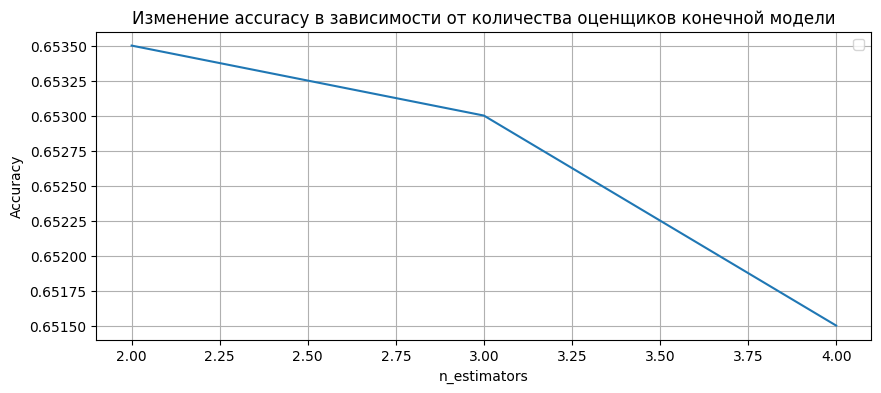

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение accuracy в зависимости от количества оценщиков конечной модели')

plt.plot([i for i in range(2, 5)], blending_accuracy_scores)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## Модель блэндинга

In [ ]:
crf, y_pred_1t = blending(2)
clf_final = RandomForestClassifier(n_estimators = 2, random_state=42)
clf_final.fit(y_pred_1t,y_train_1)
y_test_pred = make_blending_prediction(crf,clf_final, X_test)
print('accuracy:', metrics.accuracy_score(y_test, y_test_pred))

2
accuracy: 0.6535
